<a href="https://colab.research.google.com/github/Syun1208/Vehicle_And_Object_Detection_Using_YOLOv5/blob/main/Final_project_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HCMC University of Technology and Education
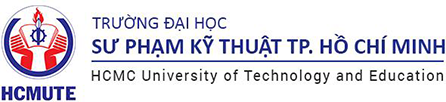
#Subject: AI: Foundations and Applications
#Members: Pham Minh Long - 19119067
#Cao Hoang Bach - 19119002
#Lecturer: Assoc. Prof. Truong Ngoc Son
#Topic: Vehicle and Traffic Signs Detection using YOLO-v5 

#Setting the environment

In [ ]:
!nvidia-smi

Fri Dec  3 09:37:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 10237, done.
remote: Total 10237 (delta 0), reused 0 (delta 0), pack-reused 10237
Receiving objects: 100% (10237/10237), 10.45 MiB | 24.37 MiB/s, done.
Resolving deltas: 100% (7102/7102), done.


In [ ]:
pip install -r yolov5/requirements.txt

#Setting the datasets

In [ ]:
!mkdir dataset
%cd dataset

/content/dataset


In [ ]:
!gdown --id 1kufnAt713UlRa7HVD78YR602UD4uIoXX

Downloading...
From: https://drive.google.com/uc?id=1kufnAt713UlRa7HVD78YR602UD4uIoXX
To: /content/dataset/Label.rar
100% 339k/339k [00:00<00:00, 49.7MB/s]


In [ ]:
!unrar x /content/dataset/Label.rar
!rm -r /content/dataset/Label.rar

In [ ]:
!gdown --id 1yPIxOzatxEjU1fk0DXI-Ye9wKLjne88-

Downloading...
From: https://drive.google.com/uc?id=1yPIxOzatxEjU1fk0DXI-Ye9wKLjne88-
To: /content/dataset/Image_AI.rar
100% 1.35G/1.35G [00:11<00:00, 123MB/s] 


In [ ]:
!unrar x /content/dataset/Image_AI.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/dataset/Image_AI.rar

Creating    Sample_AI_Video_2                                         OK
Extracting  Sample_AI_Video_2/image2_0.png                                 0%  OK 
Extracting  Sample_AI_Video_2/image2_10017.png                             0%  OK 
Extracting  Sample_AI_Video_2/image2_10038.png                             0%  OK 
Extracting  Sample_AI_Video_2/image2_10059.png                             0%  OK 
Extracting  Sample_AI_Video_2/image2_1008.png                              0%  OK 
Extracting  Sample_AI_Video_2/image2_10080.png                             0%  OK 
Extracting  Sample_AI_Video_2/image2_10101.png                             0%  OK 
Extracting  Sample_AI_Video_2/image2_10122.png                             0%  OK 
Extracting  Sample_AI_Video_2/image2_10143.png                           

In [ ]:
!rm -r /content/dataset/Image_AI.rar

In [ ]:
%cd /content/dataset/
!touch datasets.yaml

/content/dataset


#YOLOv5 Architecture
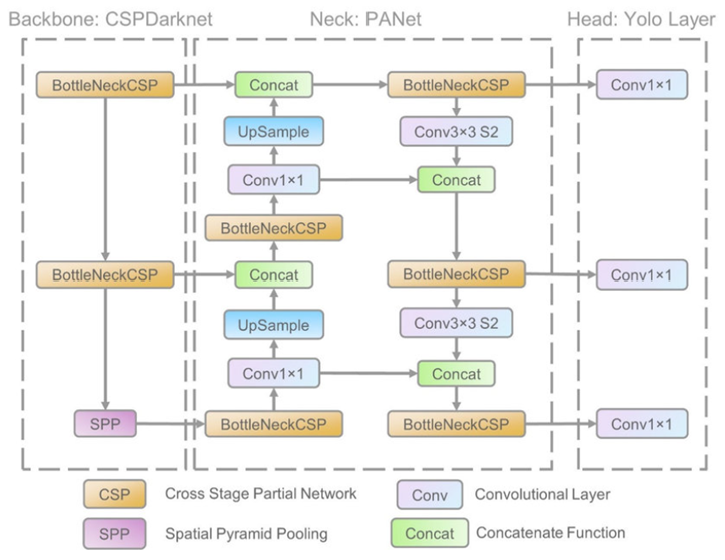

#CSPDenseNet
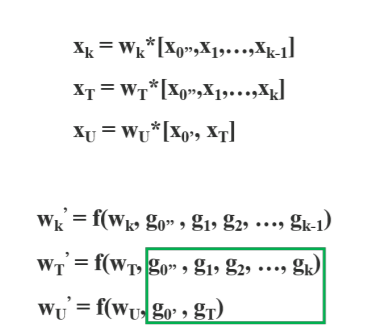
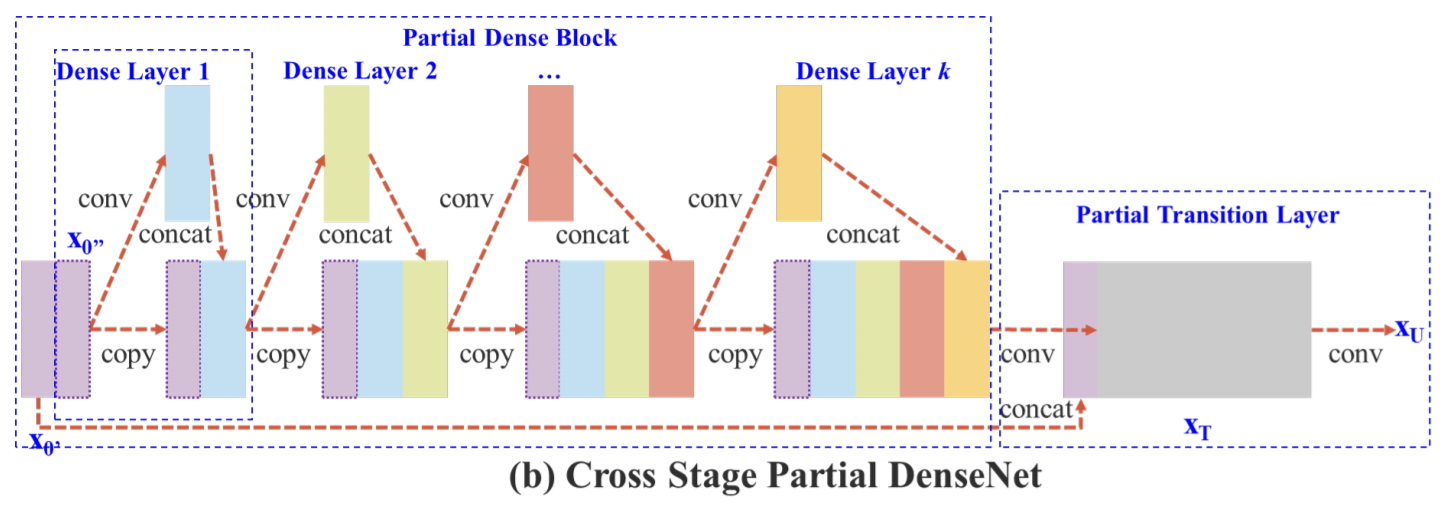


#Spatial Pyramid Pooling
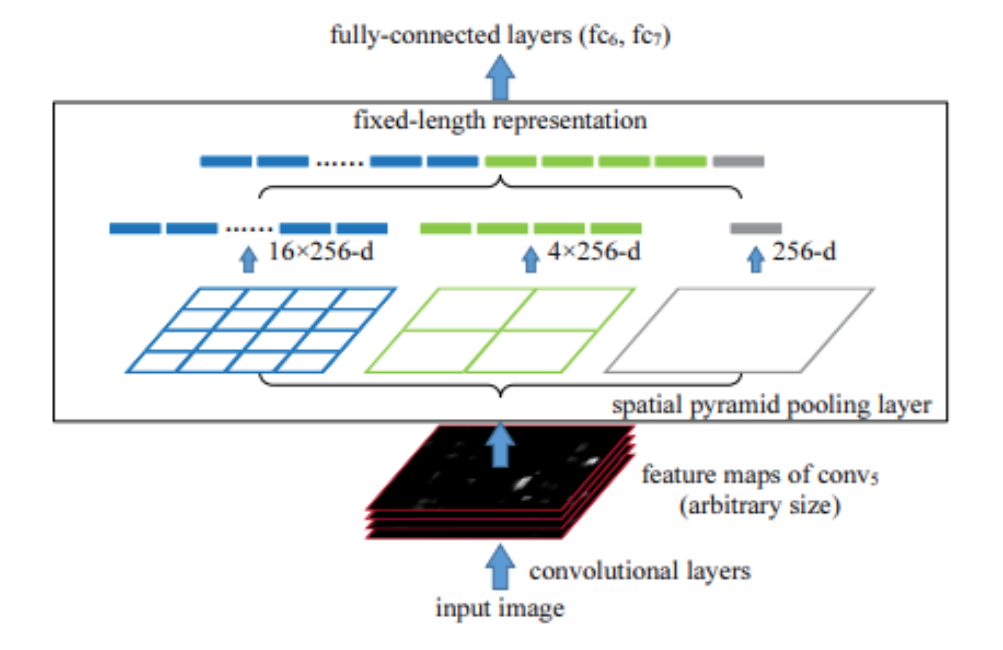

#Training phase

In [ ]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 3  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],

In [ ]:
%cd /content/yolov5
! python /content/yolov5/train.py --img 720 --batch 35 --epochs 30 --data ../dataset/datasets.yaml --weights yolov5s.pt --cfg ../yolov5/models/yolov5s.yaml

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=../dataset/datasets.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=30, batch_size=35, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-103-g7a39803 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, t

#30 epoches first

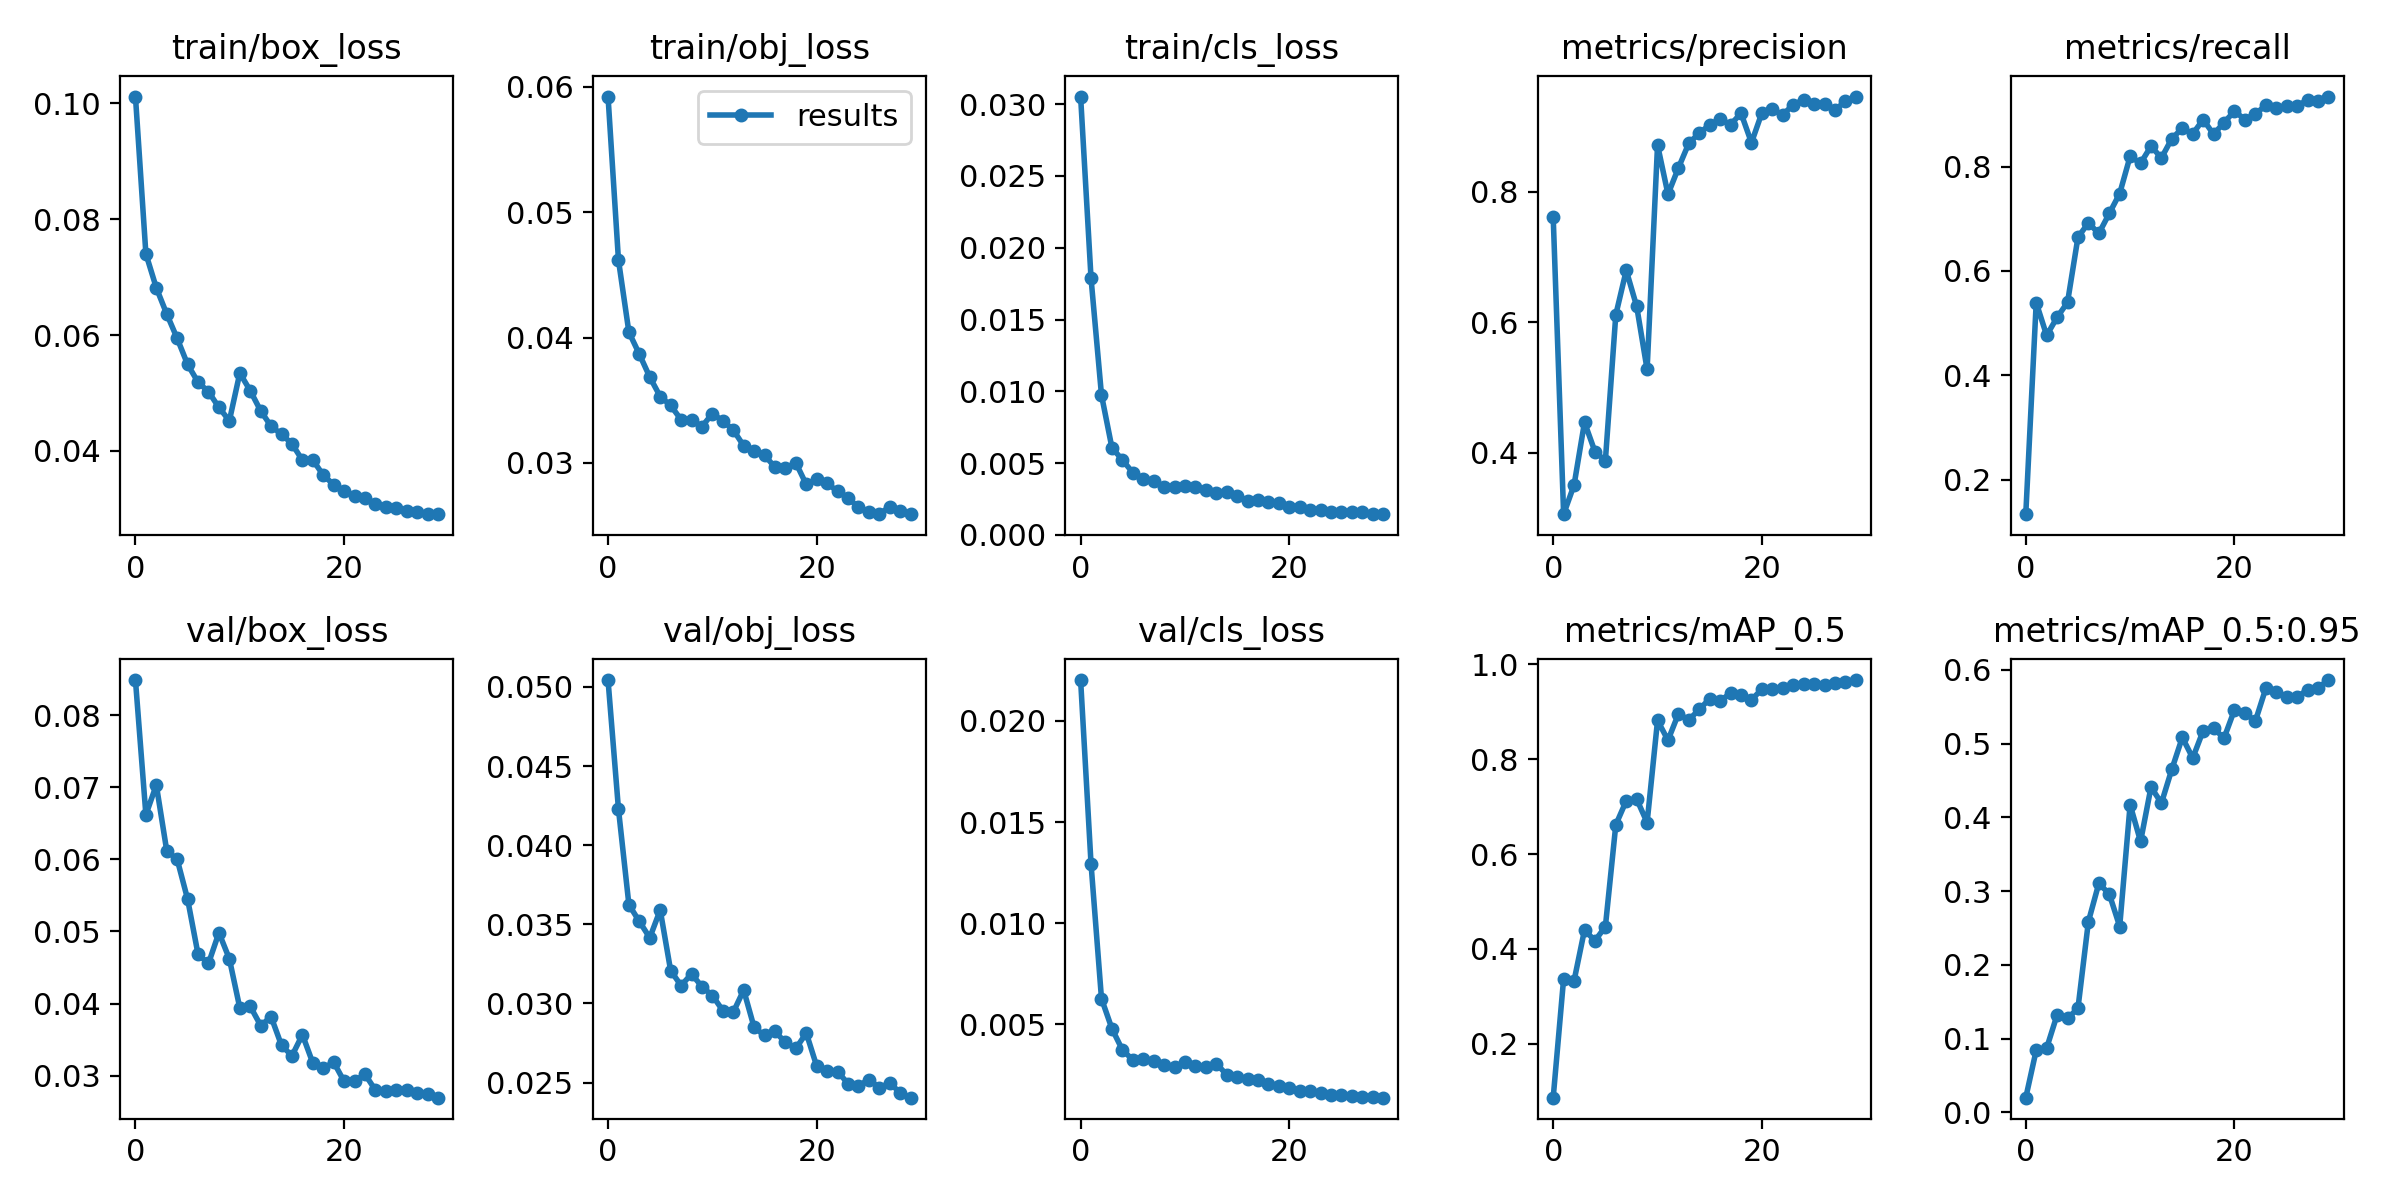

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/yolov5/runs/train/exp2/results.png")
cv2_imshow(img)


#40 epoches next 

In [ ]:
! python /content/yolov5/train.py --img 720 --batch 35 --epochs 40 --data ../dataset/datasets.yaml --weights ../yolov5/best_1.pt

train: weights=../yolov5/best_1.pt, cfg=, data=../dataset/datasets.yaml, hyp=../yolov5/data/hyps/hyp.scratch.yaml, epochs=40, batch_size=35, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=../yolov5/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-103-g7a39803 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, d

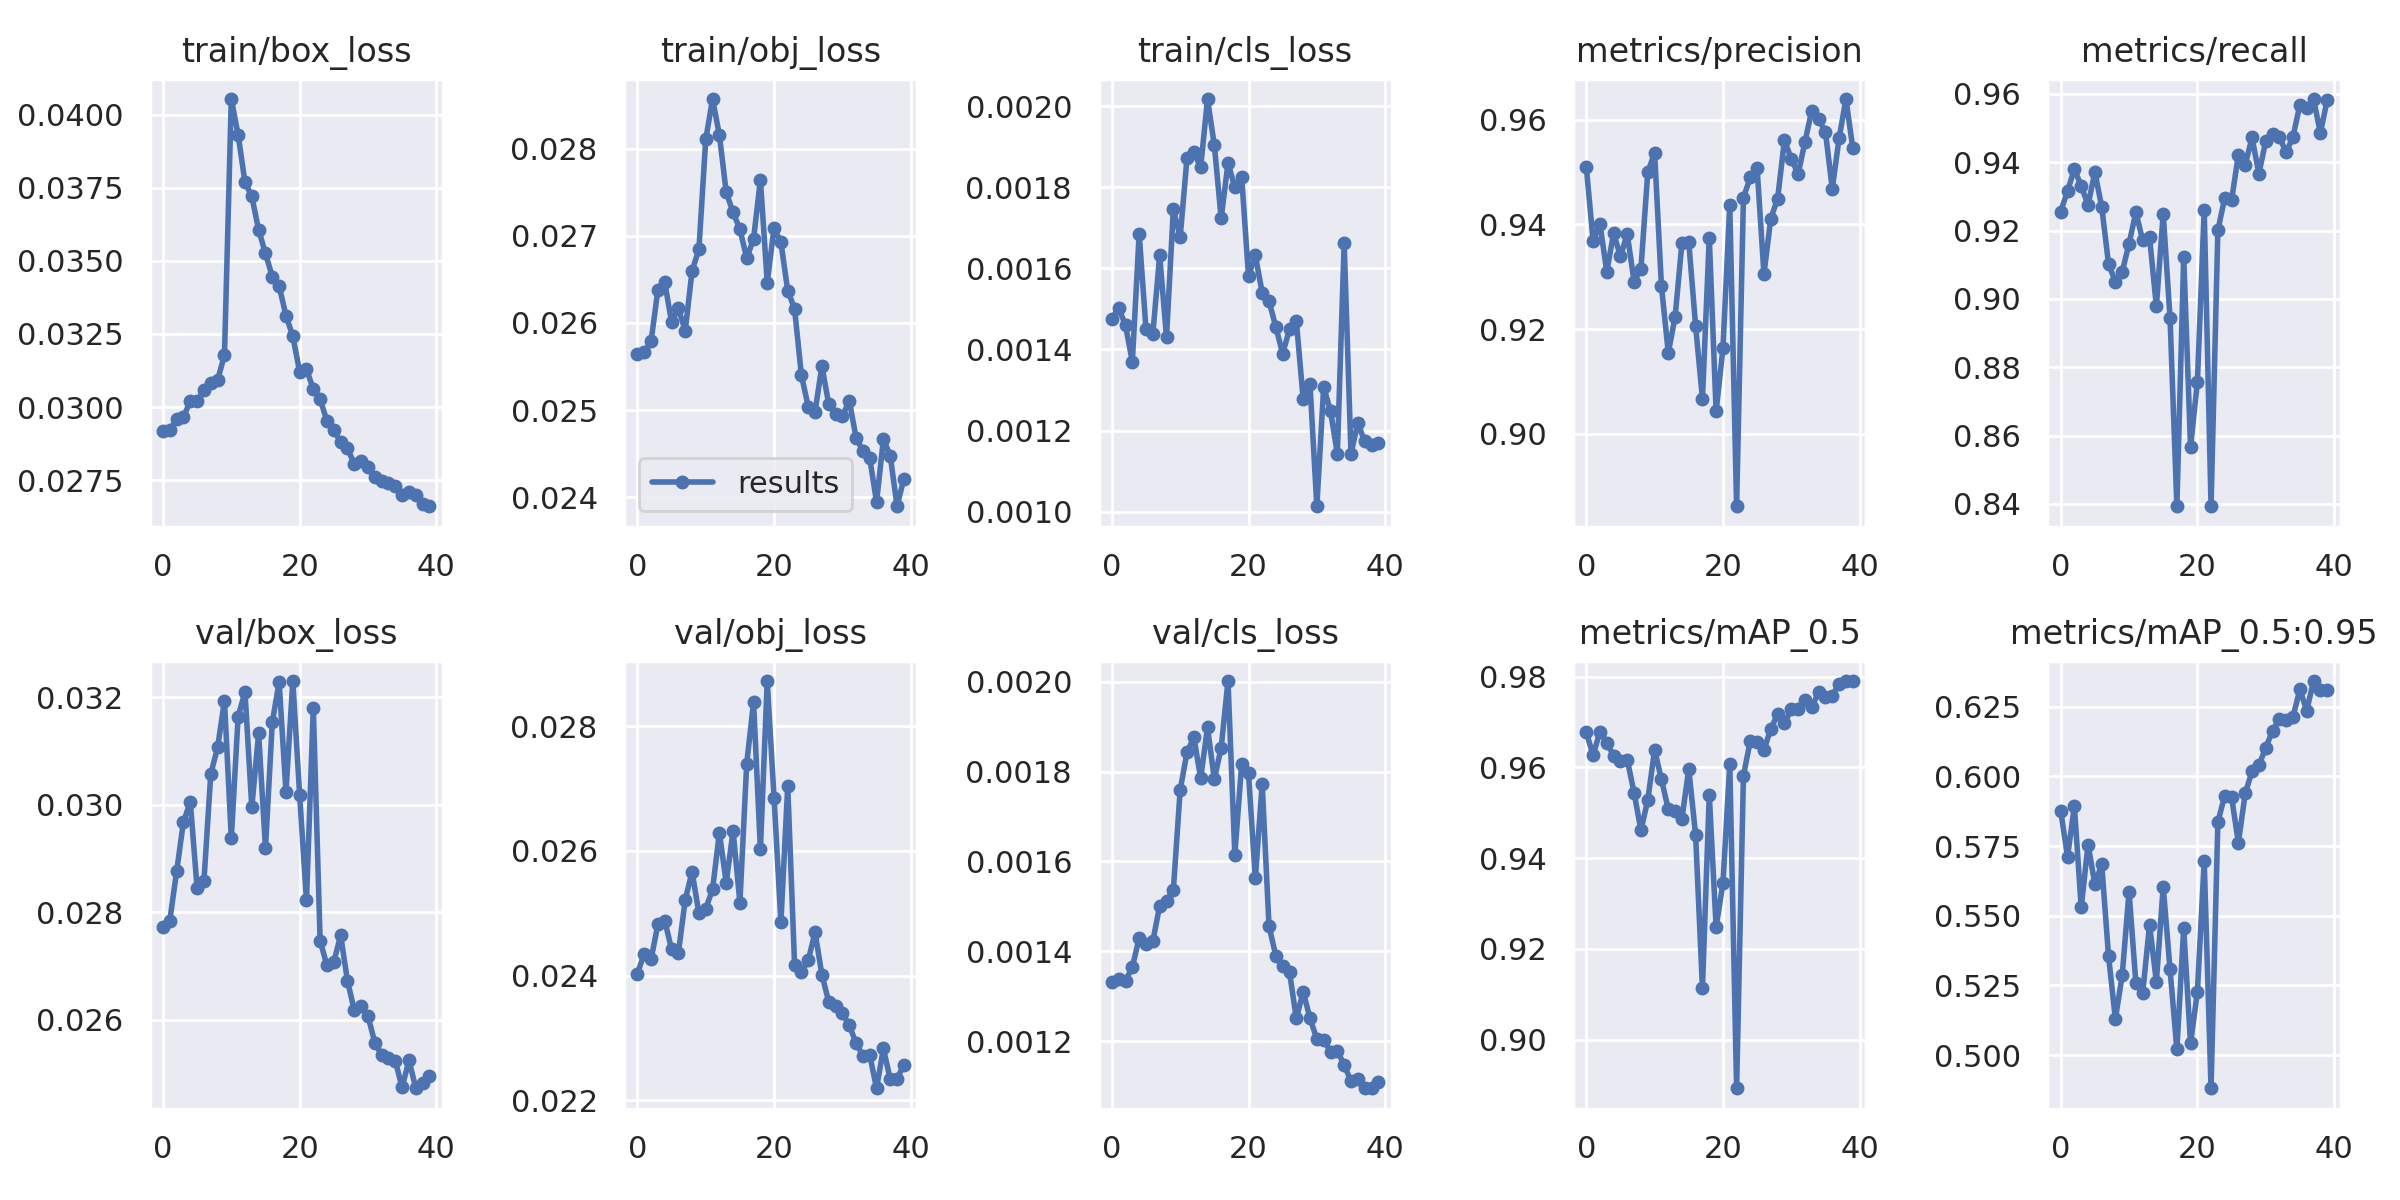

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/40.png")
cv2_imshow(img)

In [ ]:
!python /content/yolov5/val.py --data ../dataset/datasets.yaml --weights ../best.pt --img 736

val: data=../dataset/datasets.yaml, weights=['../best.pt'], batch_size=32, imgsz=736, conf_thres=0.001, iou_thres=0.6, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=../yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-110-gfcd180d torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '../dataset/labels' images and labels...2064 found, 4 missing, 0 empty, 0 corrupted: 100% 2068/2068 [00:04<00:00, 480.59it/s]
val: New cache created: ../dataset/labels.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 65/65 [01:03<00:00,  1.02it/s]
                 all       2068      10096      0.957      0.959      0.978      0.635
                 Car       2068       6692      0.975      0.959      0.987      0.722
           Motorb

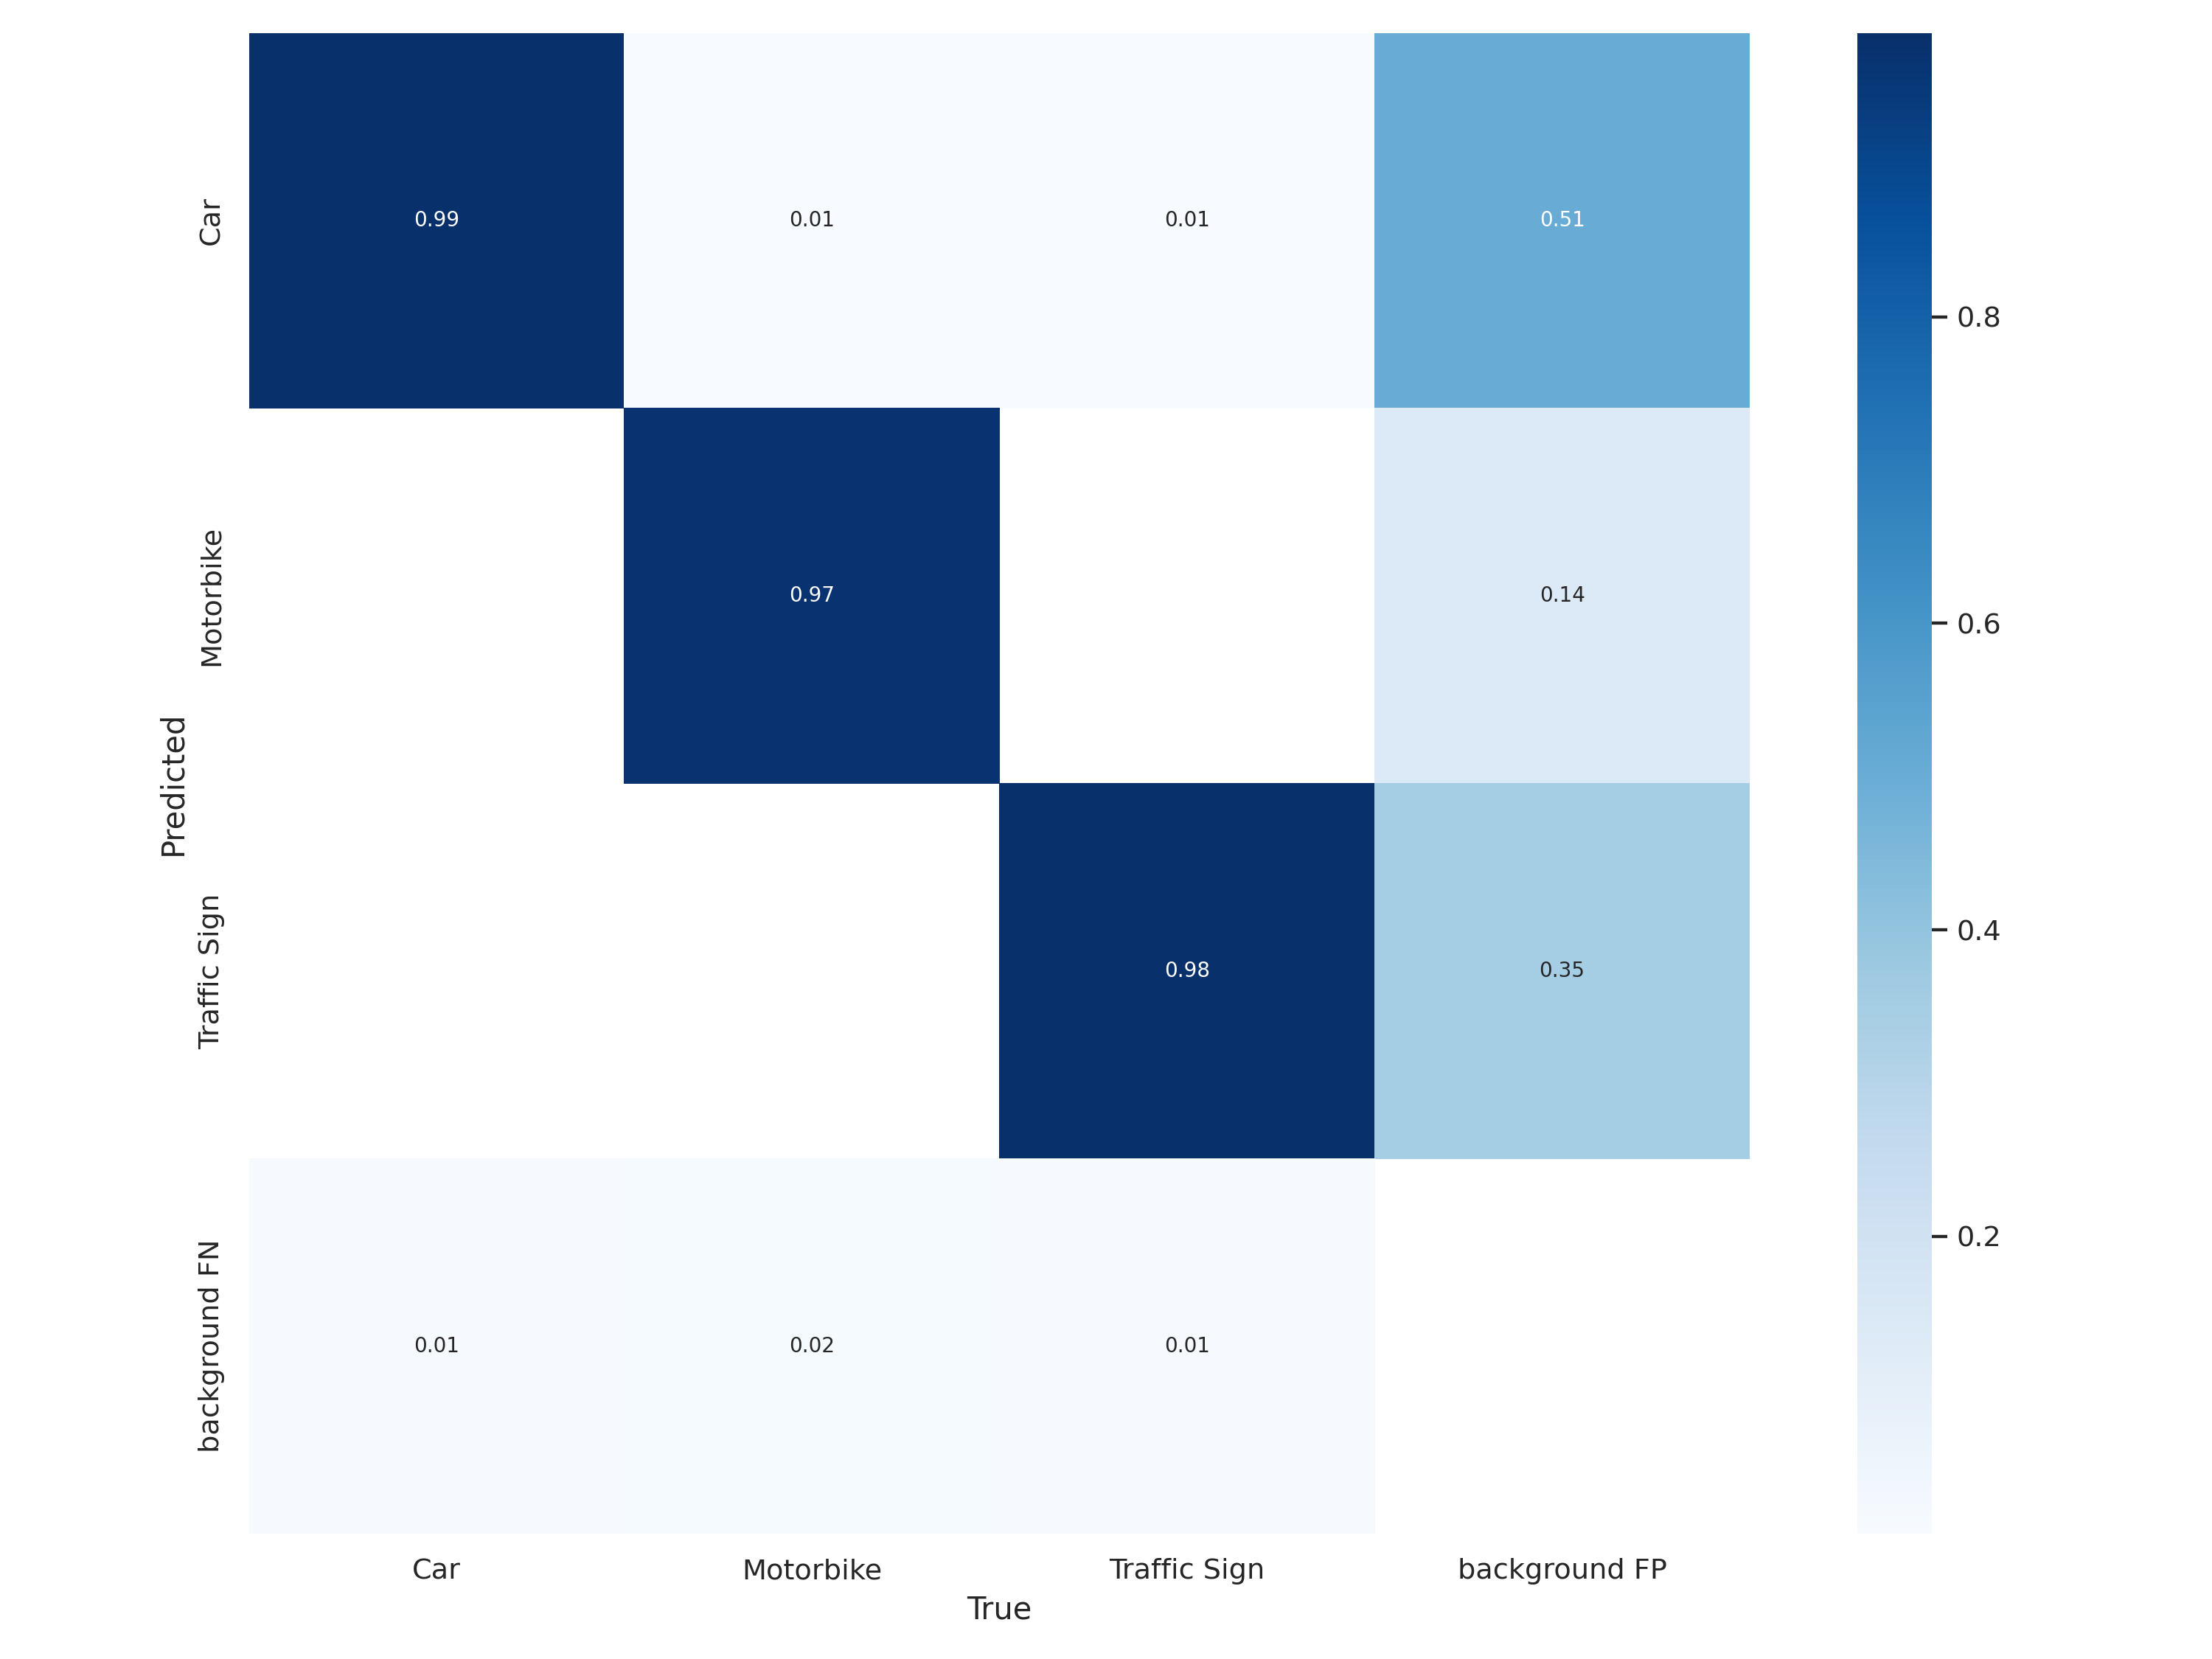

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img = cv2.imread("/content/yolov5/runs/val/exp2/confusion_matrix.png")
cv2_imshow(img)

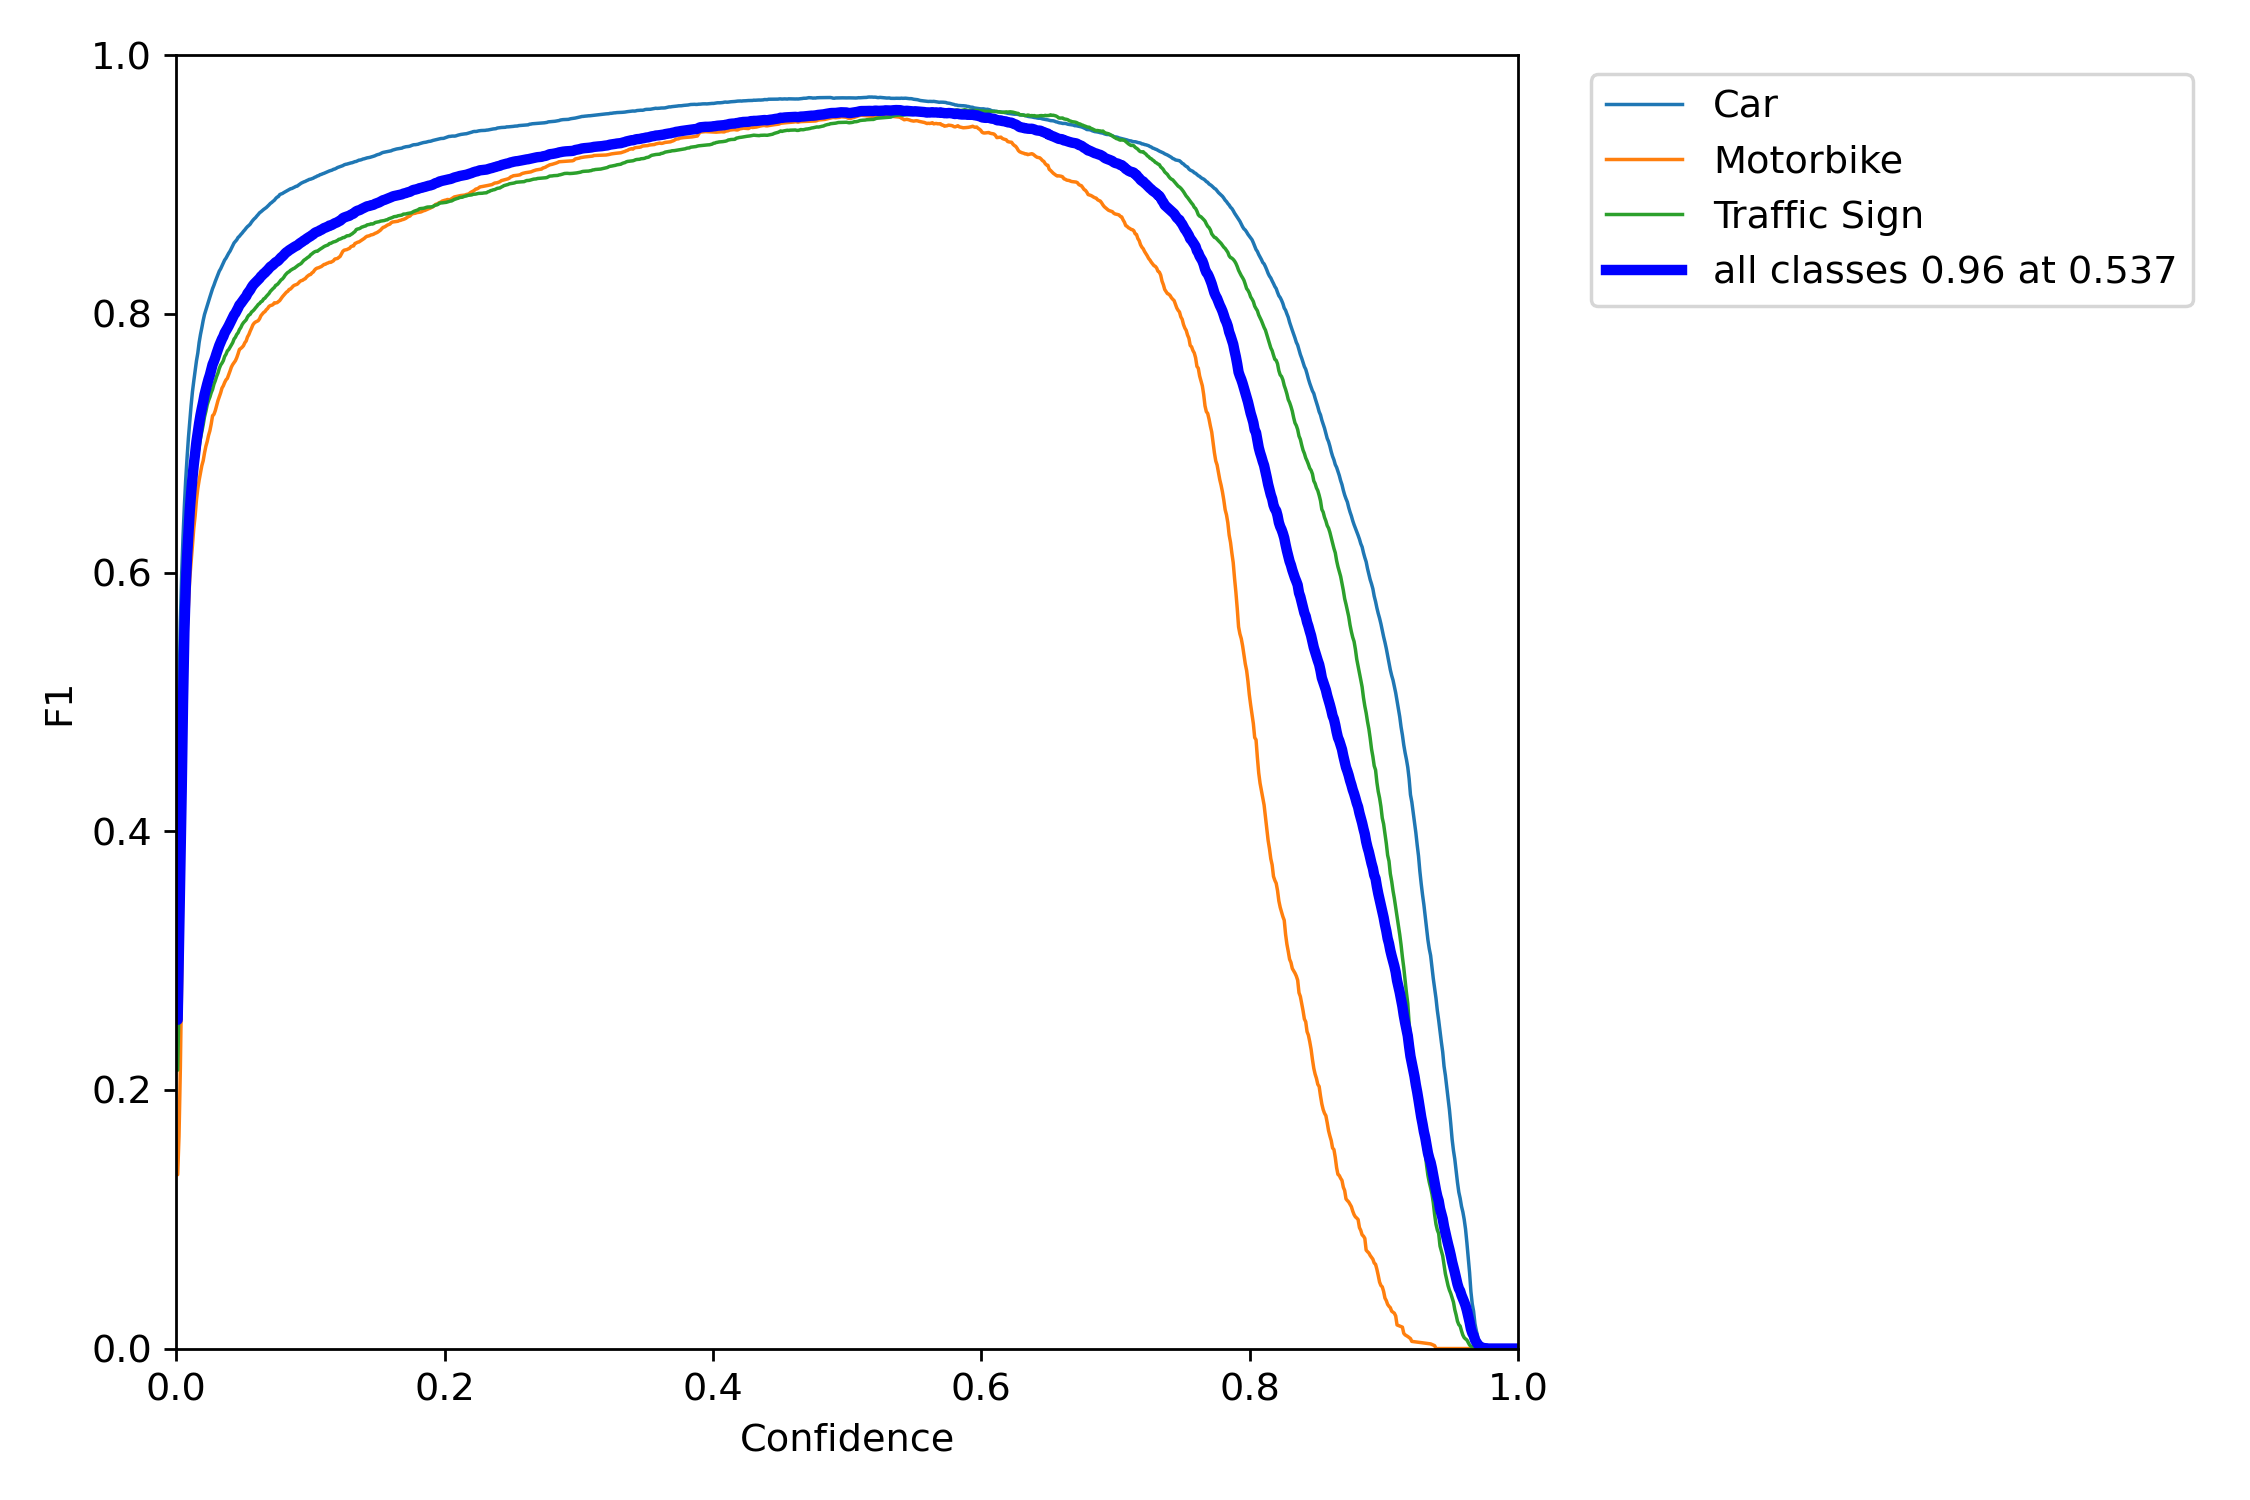

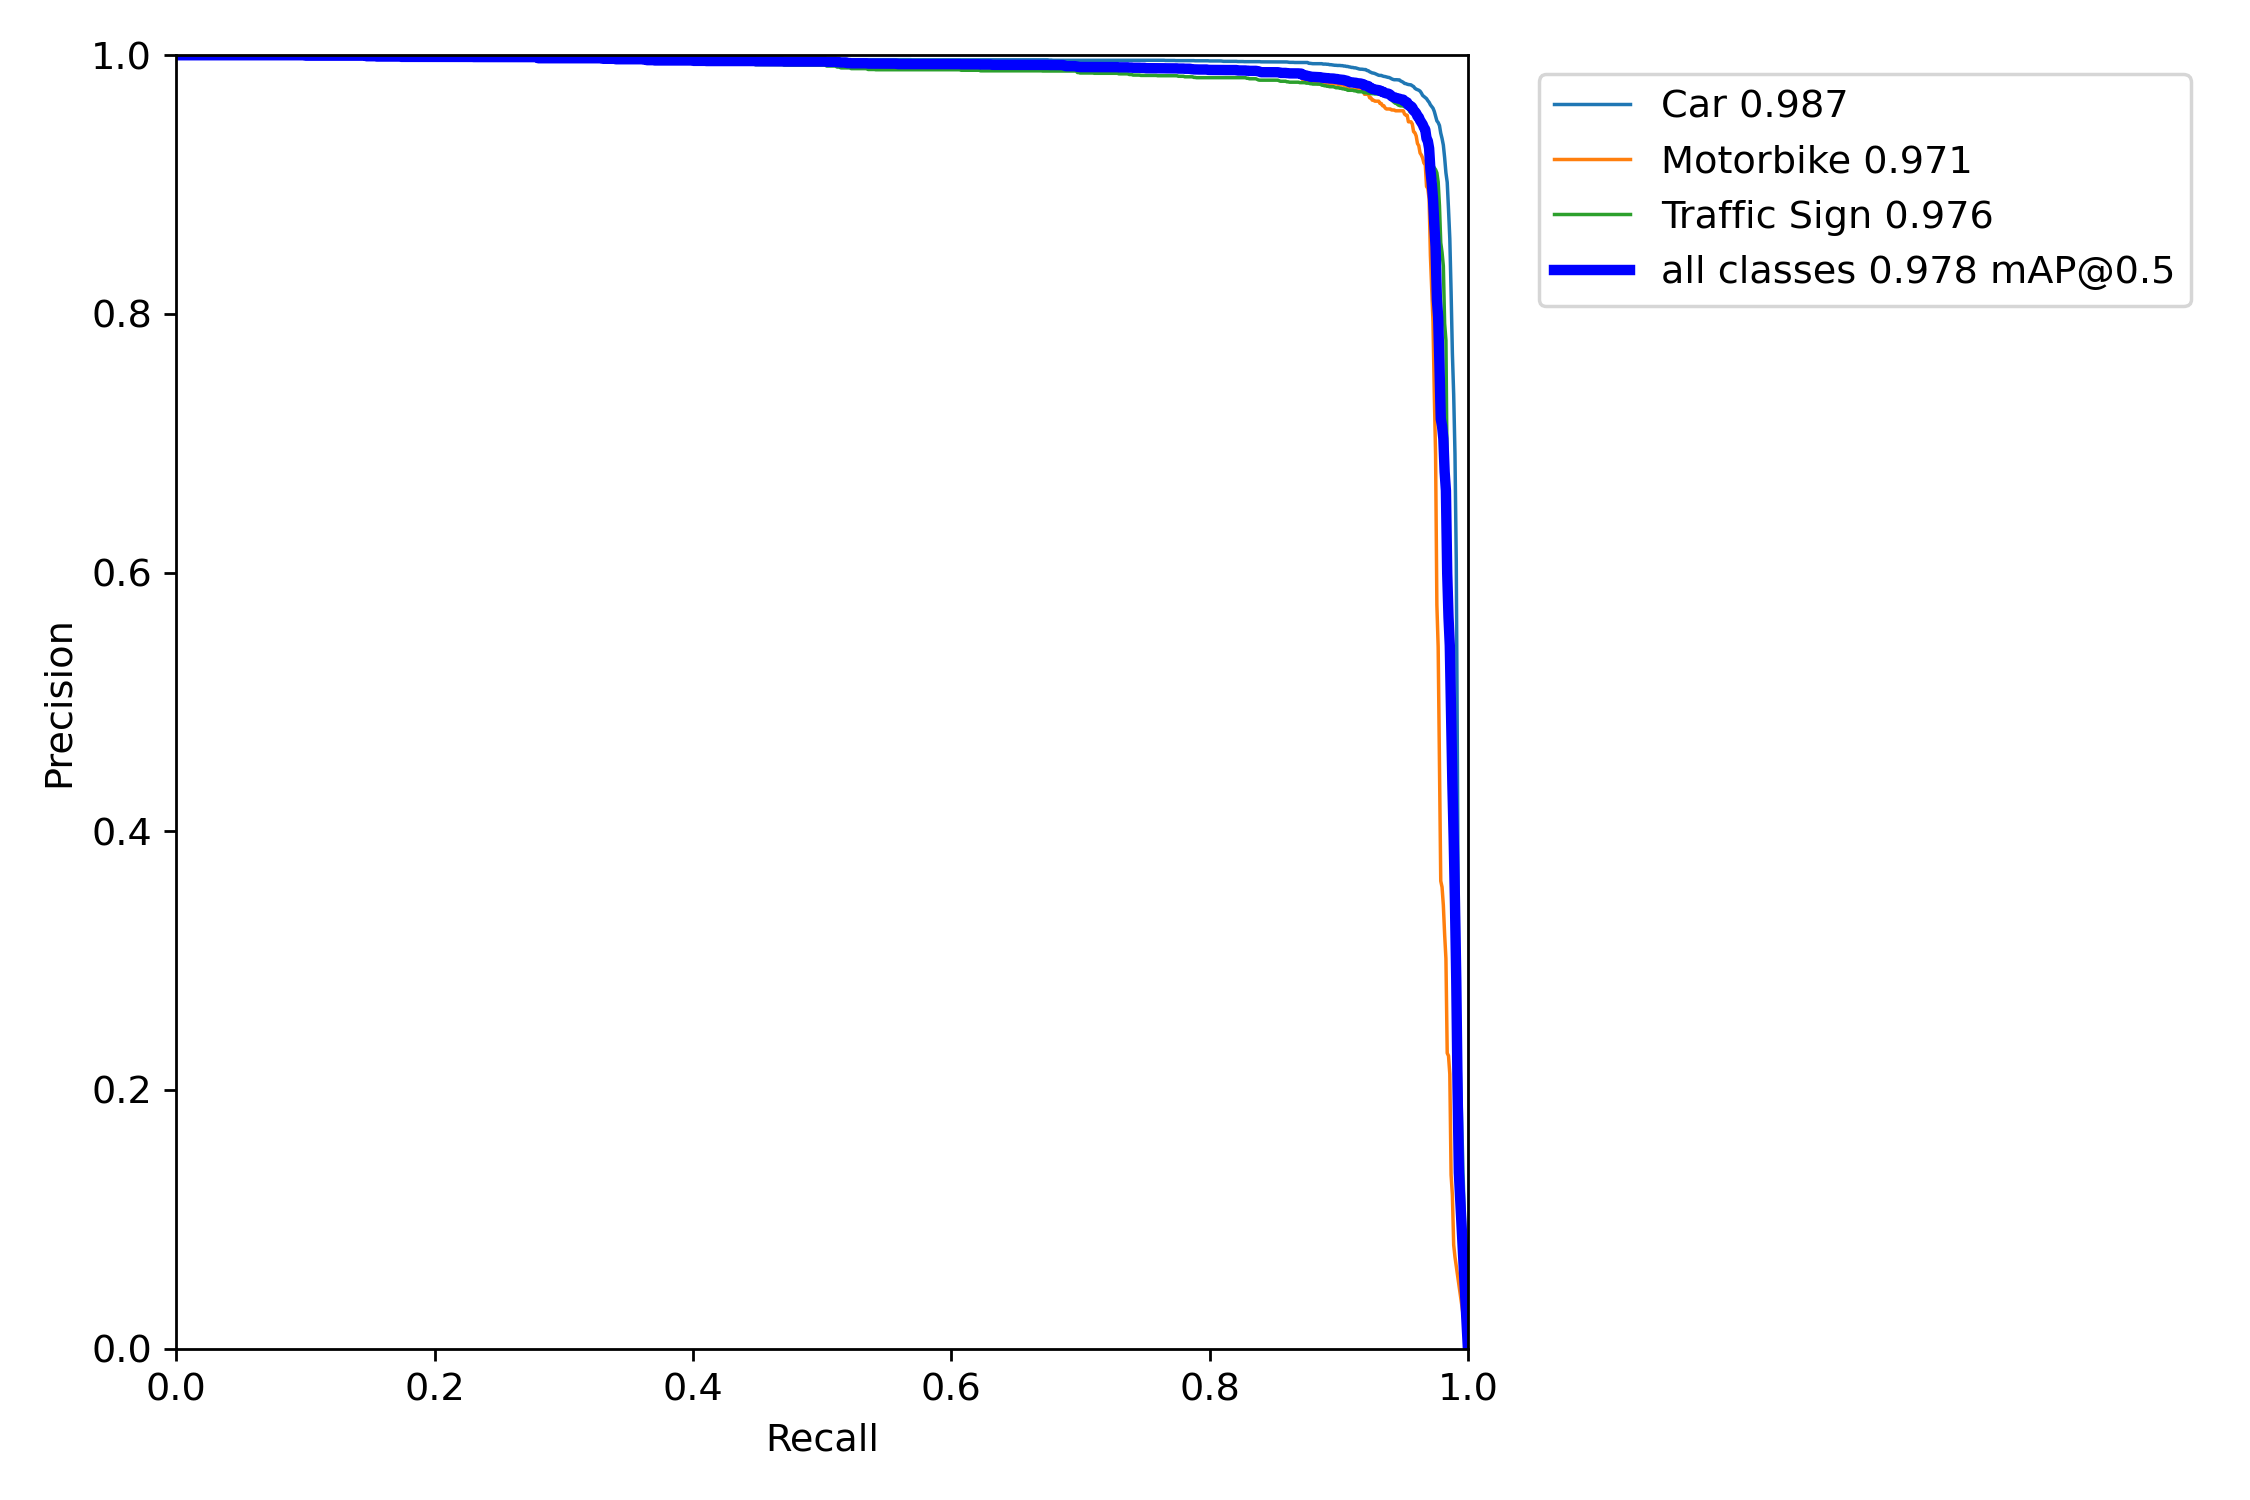

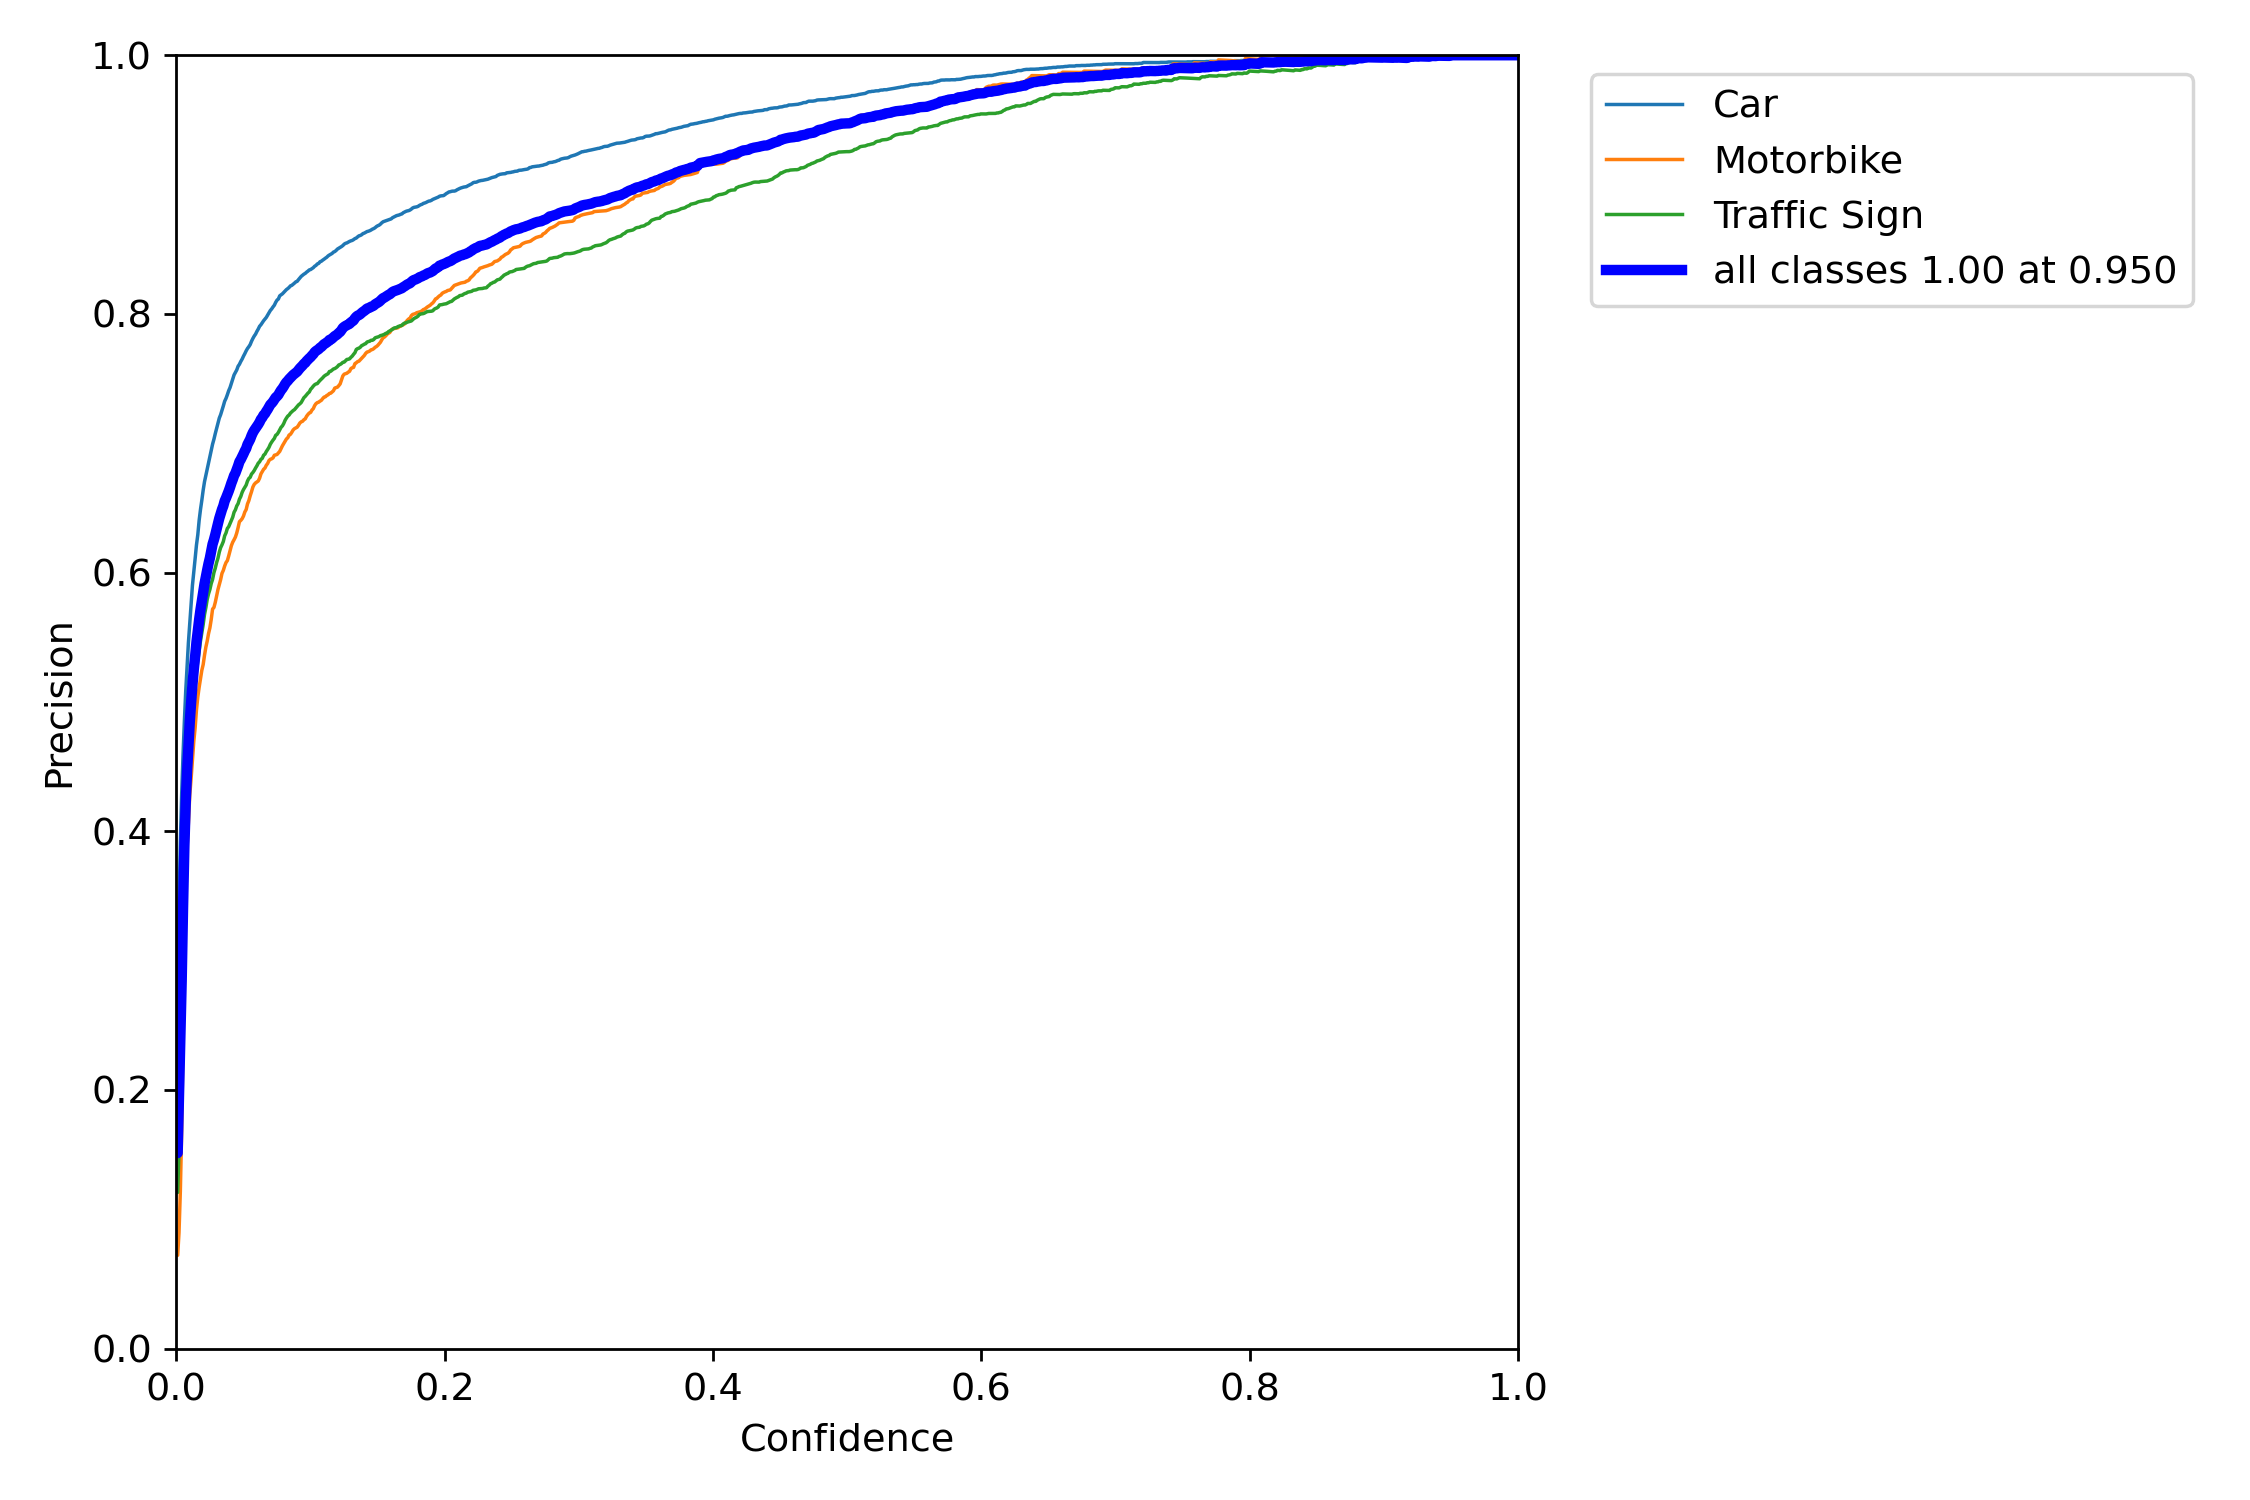

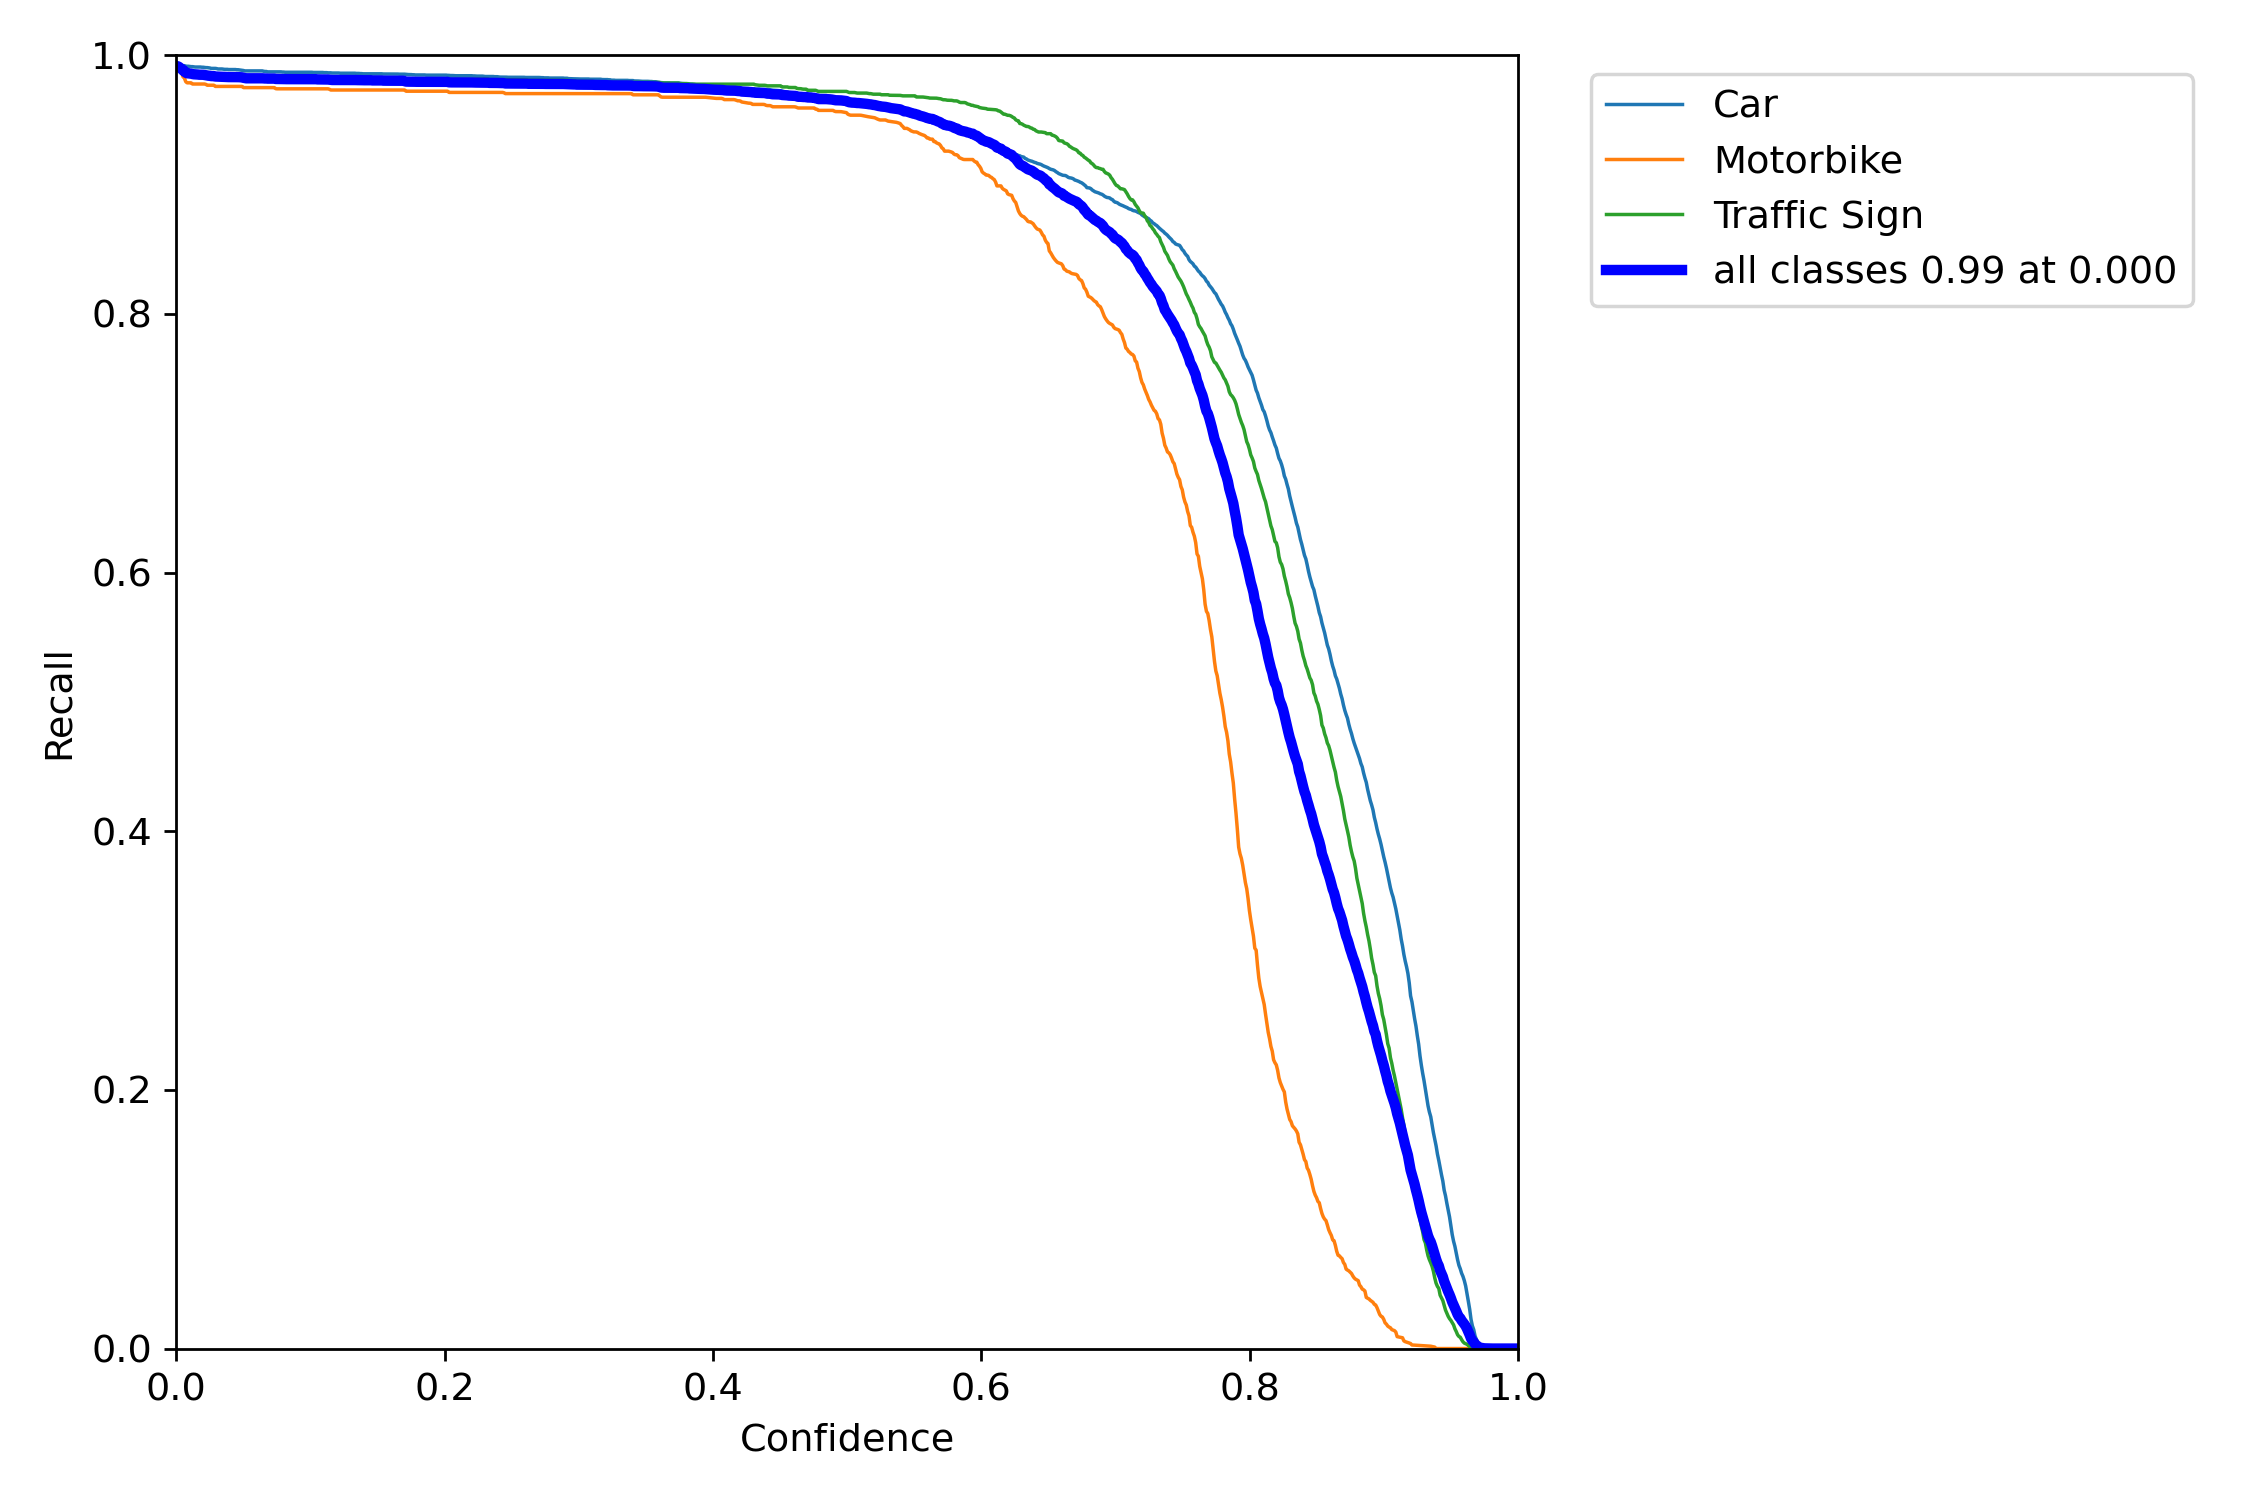

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img1 = cv2.imread("/content/yolov5/runs/val/exp/F1_curve.png")
cv2_imshow(img1)
img2 = cv2.imread("/content/yolov5/runs/val/exp/PR_curve.png")
cv2_imshow(img2)
img3 = cv2.imread("/content/yolov5/runs/val/exp/P_curve.png")
cv2_imshow(img3)
img4 = cv2.imread("/content/yolov5/runs/val/exp/R_curve.png")
cv2_imshow(img4)

#Detect the object

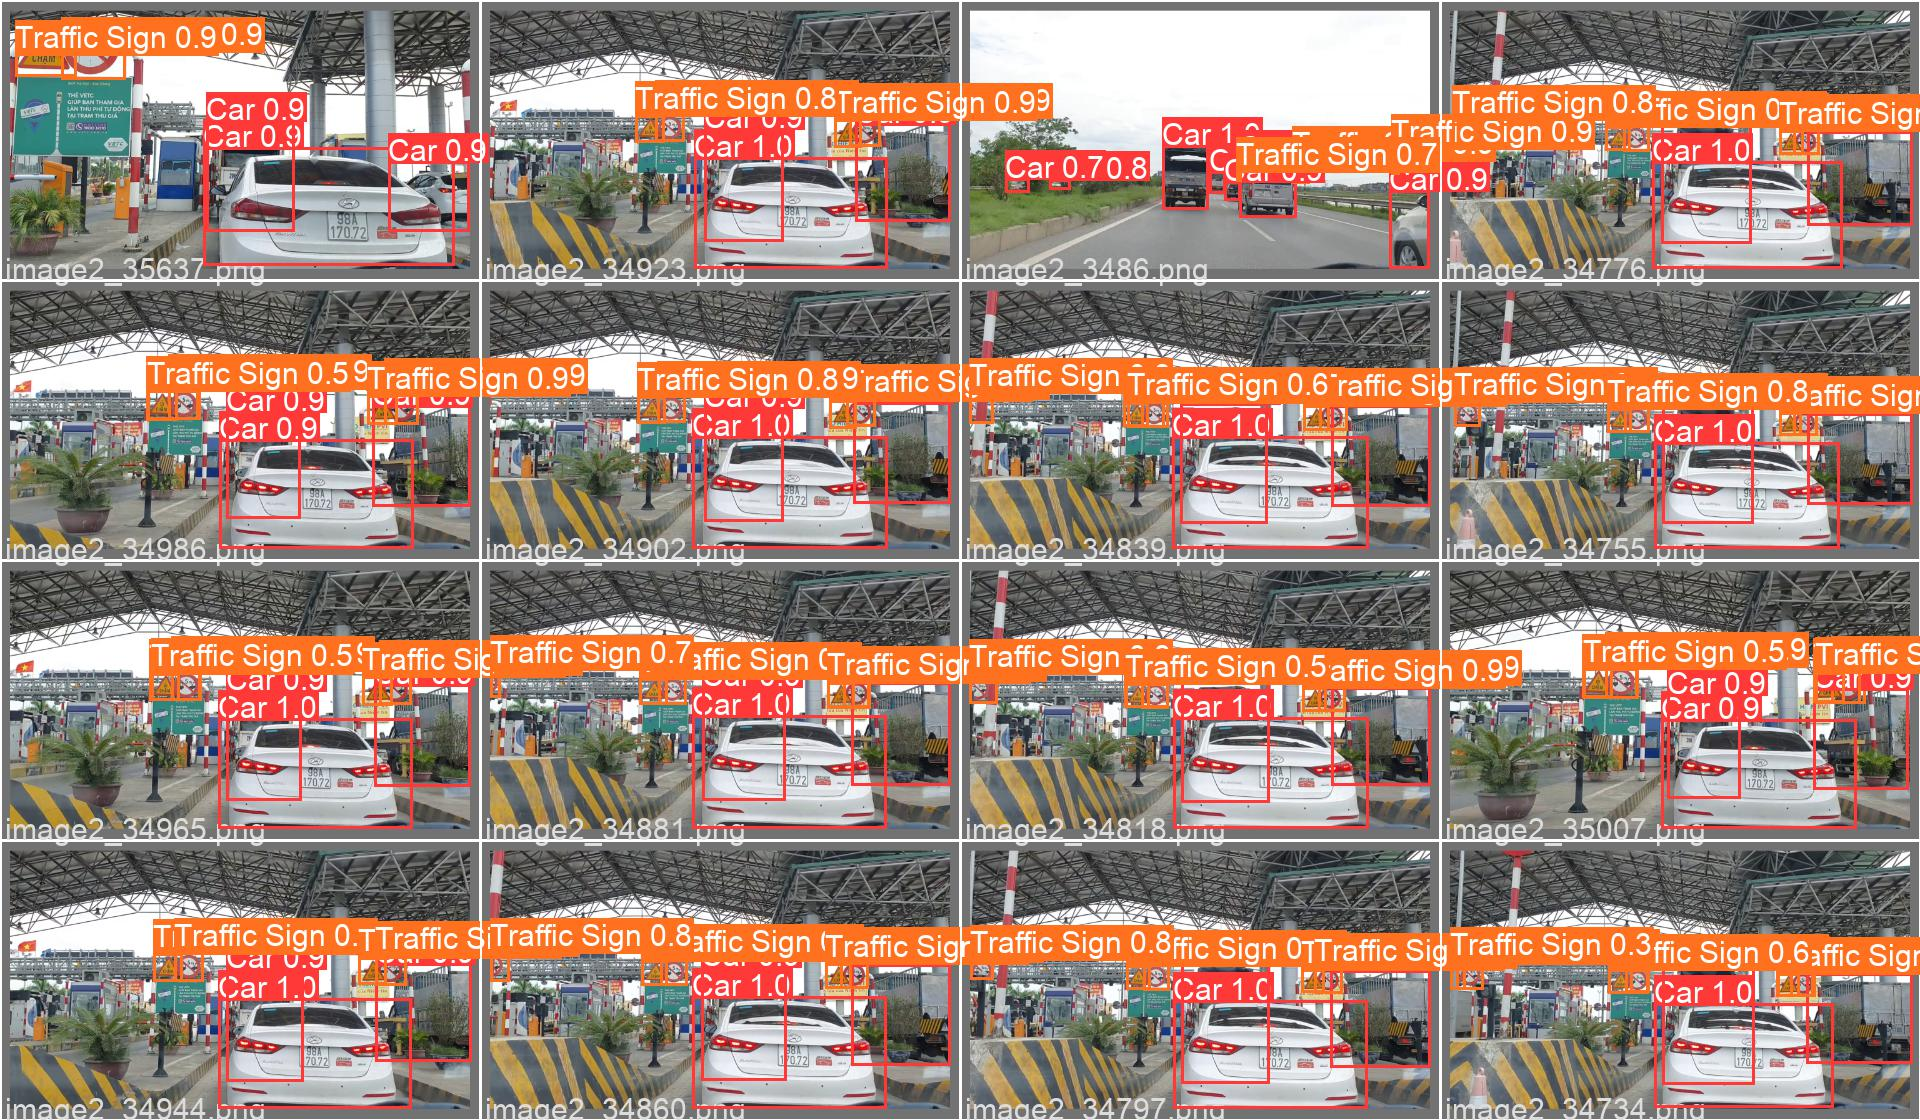

In [ ]:
img = cv2.imread("/content/yolov5/runs/val/exp/val_batch2_pred.jpg")
cv2_imshow(img)

In [ ]:
!gdown --id 1OxJ73Pe16ZZSA6rhl-X0PEKAXfEX0z2p

In [ ]:
!sudo mv /content/yolov5/Video_2.mp4 /content/

#Export video

In [ ]:
!python /content/yolov5/detect.py --weights /content/best.pt --source /content/video.mp4

Streaming output truncated to the last 5000 lines.
video 1/1 (38420/43417) /content/video.mp4: 384x640 3 Cars, 2 Motorbikes, 2 Traffic Signs, Done. (0.027s)
video 1/1 (38421/43417) /content/video.mp4: 384x640 3 Cars, 2 Motorbikes, 2 Traffic Signs, Done. (0.027s)
video 1/1 (38422/43417) /content/video.mp4: 384x640 3 Cars, 3 Motorbikes, 2 Traffic Signs, Done. (0.027s)
video 1/1 (38423/43417) /content/video.mp4: 384x640 3 Cars, 3 Motorbikes, 2 Traffic Signs, Done. (0.027s)
video 1/1 (38424/43417) /content/video.mp4: 384x640 3 Cars, 2 Motorbikes, 2 Traffic Signs, Done. (0.027s)
video 1/1 (38425/43417) /content/video.mp4: 384x640 3 Cars, 3 Motorbikes, 1 Traffic Sign, Done. (0.027s)
video 1/1 (38426/43417) /content/video.mp4: 384x640 3 Cars, 3 Motorbikes, 1 Traffic Sign, Done. (0.027s)
video 1/1 (38427/43417) /content/video.mp4: 384x640 2 Cars, 2 Motorbikes, 1 Traffic Sign, Done. (0.027s)
video 1/1 (38428/43417) /content/video.mp4: 384x640 2 Cars, 2 Motorbikes, 1 Traffic Sign, Done. (0.027s)

In [ ]:
!python /content/yolov5/detect.py --weights /content/best.pt --source 0